<h1 style='color:purple'> Predicting Wine Quality </h1>

**Dataset description:**
* volatile acidity :   Volatile acidity is the gaseous acids present in wine.
* fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
* residual sugar :   Amount of sugar left after fermentation.
* citric acid :    It is weak organic acid, found in citrus fruits naturally.
* chlorides :   Amount of salt present in wine.
* free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide 
* pH :   In wine pH is used for checking acidity
* density 
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from termcolor import colored

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,mean_squared_error

import xgboost
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("winequalityN.csv",header=0)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
#make a copy of the dataset
df_copy = df.copy(deep = True)
df_copy.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
id(df)

2832344739208

In [13]:
id(df_copy)

2832346479432

In [14]:
df_copy1 = df.copy(deep = False)
id(df_copy1)

2832346491016

In [15]:
df_copy2 = df.copy()
id(df_copy2)

2832346492424

*When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).*

*When deep=False, a new object will be created without copying the calling object’s data or index (only references to the data and index are copied). Any changes to the data of the original will be reflected in the shallow copy (and vice versa).*

**We don't want to mess up the original dataset so we will create deep copy**

In [16]:
#make a copy of the dataset
df_copy = df.copy(deep = True)
df_copy.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h1 style='color:purple'> Exploratory Analysis </h1> 

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [18]:
#check for null values
df_copy.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [19]:
#drop the null values
df_copy.dropna(inplace=True)

In [20]:
df_copy.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

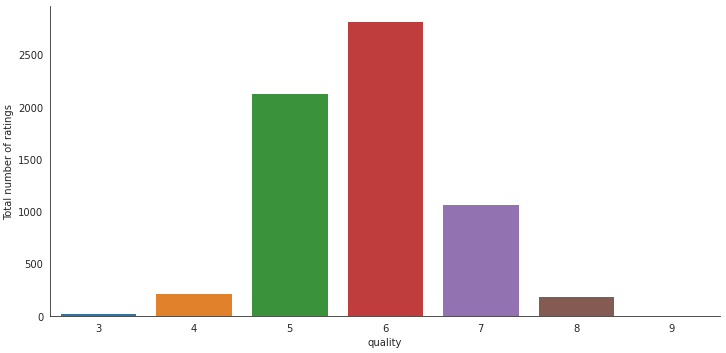

In [21]:
# distribution of target variable
with sns.axes_style('white'):
    plt = sns.factorplot('quality',data=df_copy,aspect=2,kind ='count')
    plt.set_ylabels ("Total number of ratings")

In [22]:
df_copy.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [23]:
# there is One object datatype which is to be encoded
le = LabelEncoder()

df_copy['type_enc']=le.fit_transform(df_copy['type'])

In [105]:
df_copy

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [106]:
#set the target and input features
target = df_copy['quality']
features = df_copy.drop('type',axis=1)

seed=2021

In [107]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [176]:
#divide the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=seed)

In [179]:
print(colored("shape of x_train: ",'red',attrs=['bold']),x_train.shape)
print(colored("shape of x_test: ",'red',attrs=['bold']),x_test.shape)
print(colored("shape of y_train: ",'red',attrs=['bold']),y_train.shape)
print(colored("shape of y_test: ",'red',attrs=['bold']),y_test.shape)

shape of x_train:  (5170, 13)
shape of x_test:  (1293, 13)
shape of y_train:  (5170,)
shape of y_test:  (1293,)


In [186]:
actual_test=pd.DataFrame(y_test)
actual_test.reset_index(inplace=True)

In [187]:
actual_test

,index,quality
0,2923,6
1,736,6
2,2820,5
3,5859,5
4,1435,5
...,...,...
1288,4745,3
1289,2184,6
1290,2290,7
1291,2514,7


<h1 style='color:purple'> Feature Scaling </h1> 

In [109]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

<h1 style='color:purple'> RandomForestClassifier </h1>  

In [143]:
rfc = RandomForestClassifier()

In [144]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
train_pred = rfc.predict(x_train)
test_pred = rfc.predict(x_test)

In [146]:
print(colored("Classification report for train data:\n",'red',attrs=['bold']),classification_report(y_train,train_pred))

Classification report for train data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00      1707
           6       1.00      1.00      1.00      2273
           7       1.00      1.00      1.00       840
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00         2

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170



In [147]:
print(colored("Classification report for test data:\n",'red',attrs=['bold']),classification_report(y_test,test_pred))

Classification report for test data:
               precision    recall  f1-score   support

           3       1.00      0.67      0.80         6
           4       0.96      1.00      0.98        47
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       547
           7       1.00      1.00      1.00       234
           8       0.92      0.97      0.94        35
           9       0.00      0.00      0.00         3

    accuracy                           1.00      1293
   macro avg       0.84      0.81      0.82      1293
weighted avg       0.99      1.00      0.99      1293



In [148]:
#keep a copy of predictions 
taste = test_pred.copy()

In [149]:
# save predictions in a csv file with predicted values encoded as bad,normal and good 
output_rfc = pd.DataFrame()
output_rfc['taste'] = taste

In [150]:
output_rfc['taste_rfc'] = ['bad' if x<6 else 'normal' if x==6 else 'good' for x in output_rfc['taste']]

In [151]:
output_rfc.to_csv('output_rfc.csv')
output_rfc.head()

,taste,taste_rfc
0,6,normal
1,6,normal
2,5,bad
3,5,bad
4,5,bad


<h1 style='color:purple'> XGBClassifier </h1>  

In [152]:
xgb = xgboost.XGBClassifier()

In [153]:
xgb.fit(x_train,y_train)

[23:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [154]:
train_pred = xgb.predict(x_train)
test_pred = xgb.predict(x_test)

In [155]:
print(colored("Classification report for train data:\n",'red',attrs=['bold']),classification_report(y_train,train_pred))

Classification report for train data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00      1707
           6       1.00      1.00      1.00      2273
           7       1.00      1.00      1.00       840
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00         2

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170



In [156]:
print(colored("Classification report for test data:\n",'red',attrs=['bold']),classification_report(y_test,test_pred))

Classification report for test data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       547
           7       1.00      1.00      1.00       234
           8       0.92      1.00      0.96        35
           9       0.00      0.00      0.00         3

    accuracy                           1.00      1293
   macro avg       0.85      0.86      0.85      1293
weighted avg       1.00      1.00      1.00      1293



In [157]:
output_xgb = pd.DataFrame()
output_xgb['taste'] = taste
output_xgb['taste_xgb'] = ['bad' if x<6 else 'normal' if x==6 else 'good' for x in output_xgb['taste']]

In [158]:
output_xgb.to_csv('output_xgb.csv')
output_xgb.head()

,taste,taste_xgb
0,6,normal
1,6,normal
2,5,bad
3,5,bad
4,5,bad


<h1 style='color:purple'> CatBoostClassifier </h1>   

In [159]:
clf = CatBoostClassifier()

In [195]:
clf.fit(x_train,y_train)

Learning rate set to 0.086042
0:	learn: 1.4784579	total: 36.6ms	remaining: 36.6s
1:	learn: 1.2133609	total: 53.5ms	remaining: 26.7s
2:	learn: 1.0286895	total: 70ms	remaining: 23.2s
3:	learn: 0.8871442	total: 85.6ms	remaining: 21.3s
4:	learn: 0.7751814	total: 102ms	remaining: 20.2s
5:	learn: 0.6875550	total: 119ms	remaining: 19.7s
6:	learn: 0.6099257	total: 134ms	remaining: 19.1s
7:	learn: 0.5439688	total: 150ms	remaining: 18.6s
8:	learn: 0.4859899	total: 165ms	remaining: 18.2s
9:	learn: 0.4369600	total: 185ms	remaining: 18.3s
10:	learn: 0.3927946	total: 208ms	remaining: 18.7s
11:	learn: 0.3556085	total: 228ms	remaining: 18.8s
12:	learn: 0.3213833	total: 247ms	remaining: 18.7s
13:	learn: 0.2910462	total: 266ms	remaining: 18.7s
14:	learn: 0.2641219	total: 285ms	remaining: 18.7s
15:	learn: 0.2407270	total: 304ms	remaining: 18.7s
16:	learn: 0.2201954	total: 323ms	remaining: 18.7s
17:	learn: 0.2033383	total: 343ms	remaining: 18.7s
18:	learn: 0.1852422	total: 359ms	remaining: 18.5s
19:	learn

162:	learn: 0.0015159	total: 2.75s	remaining: 14.1s
163:	learn: 0.0014940	total: 2.77s	remaining: 14.1s
164:	learn: 0.0014863	total: 2.78s	remaining: 14.1s
165:	learn: 0.0014777	total: 2.8s	remaining: 14.1s
166:	learn: 0.0014355	total: 2.81s	remaining: 14s
167:	learn: 0.0014274	total: 2.83s	remaining: 14s
168:	learn: 0.0013876	total: 2.84s	remaining: 14s
169:	learn: 0.0013800	total: 2.86s	remaining: 14s
170:	learn: 0.0013423	total: 2.87s	remaining: 13.9s
171:	learn: 0.0013065	total: 2.89s	remaining: 13.9s
172:	learn: 0.0013002	total: 2.9s	remaining: 13.9s
173:	learn: 0.0012662	total: 2.92s	remaining: 13.9s
174:	learn: 0.0012647	total: 2.94s	remaining: 13.8s
175:	learn: 0.0012582	total: 2.95s	remaining: 13.8s
176:	learn: 0.0012550	total: 2.97s	remaining: 13.8s
177:	learn: 0.0012512	total: 2.98s	remaining: 13.8s
178:	learn: 0.0012450	total: 3s	remaining: 13.8s
179:	learn: 0.0012397	total: 3.01s	remaining: 13.7s
180:	learn: 0.0012380	total: 3.02s	remaining: 13.7s
181:	learn: 0.0012353	tot

332:	learn: 0.0005124	total: 5.48s	remaining: 11s
333:	learn: 0.0005121	total: 5.5s	remaining: 11s
334:	learn: 0.0005111	total: 5.52s	remaining: 10.9s
335:	learn: 0.0005086	total: 5.53s	remaining: 10.9s
336:	learn: 0.0005078	total: 5.55s	remaining: 10.9s
337:	learn: 0.0005038	total: 5.56s	remaining: 10.9s
338:	learn: 0.0005014	total: 5.58s	remaining: 10.9s
339:	learn: 0.0005011	total: 5.59s	remaining: 10.9s
340:	learn: 0.0005003	total: 5.61s	remaining: 10.8s
341:	learn: 0.0004971	total: 5.63s	remaining: 10.8s
342:	learn: 0.0004963	total: 5.64s	remaining: 10.8s
343:	learn: 0.0004959	total: 5.66s	remaining: 10.8s
344:	learn: 0.0004950	total: 5.68s	remaining: 10.8s
345:	learn: 0.0004941	total: 5.7s	remaining: 10.8s
346:	learn: 0.0004933	total: 5.71s	remaining: 10.8s
347:	learn: 0.0004910	total: 5.73s	remaining: 10.7s
348:	learn: 0.0004901	total: 5.75s	remaining: 10.7s
349:	learn: 0.0004878	total: 5.76s	remaining: 10.7s
350:	learn: 0.0004856	total: 5.78s	remaining: 10.7s
351:	learn: 0.0004

494:	learn: 0.0003307	total: 8.04s	remaining: 8.2s
495:	learn: 0.0003304	total: 8.05s	remaining: 8.19s
496:	learn: 0.0003289	total: 8.07s	remaining: 8.17s
497:	learn: 0.0003287	total: 8.09s	remaining: 8.15s
498:	learn: 0.0003277	total: 8.1s	remaining: 8.13s
499:	learn: 0.0003273	total: 8.12s	remaining: 8.12s
500:	learn: 0.0003264	total: 8.13s	remaining: 8.1s
501:	learn: 0.0003263	total: 8.15s	remaining: 8.09s
502:	learn: 0.0003259	total: 8.17s	remaining: 8.07s
503:	learn: 0.0003245	total: 8.18s	remaining: 8.05s
504:	learn: 0.0003242	total: 8.2s	remaining: 8.03s
505:	learn: 0.0003228	total: 8.22s	remaining: 8.02s
506:	learn: 0.0003215	total: 8.23s	remaining: 8.01s
507:	learn: 0.0003201	total: 8.25s	remaining: 7.99s
508:	learn: 0.0003198	total: 8.26s	remaining: 7.97s
509:	learn: 0.0003189	total: 8.28s	remaining: 7.96s
510:	learn: 0.0003186	total: 8.29s	remaining: 7.94s
511:	learn: 0.0003177	total: 8.31s	remaining: 7.92s
512:	learn: 0.0003164	total: 8.32s	remaining: 7.9s
513:	learn: 0.000

653:	learn: 0.0002478	total: 10.8s	remaining: 5.69s
654:	learn: 0.0002470	total: 10.8s	remaining: 5.67s
655:	learn: 0.0002468	total: 10.8s	remaining: 5.66s
656:	learn: 0.0002467	total: 10.8s	remaining: 5.64s
657:	learn: 0.0002465	total: 10.8s	remaining: 5.63s
658:	learn: 0.0002463	total: 10.8s	remaining: 5.61s
659:	learn: 0.0002458	total: 10.9s	remaining: 5.6s
660:	learn: 0.0002457	total: 10.9s	remaining: 5.58s
661:	learn: 0.0002456	total: 10.9s	remaining: 5.57s
662:	learn: 0.0002454	total: 10.9s	remaining: 5.55s
663:	learn: 0.0002452	total: 10.9s	remaining: 5.54s
664:	learn: 0.0002447	total: 11s	remaining: 5.52s
665:	learn: 0.0002437	total: 11s	remaining: 5.51s
666:	learn: 0.0002429	total: 11s	remaining: 5.5s
667:	learn: 0.0002424	total: 11s	remaining: 5.48s
668:	learn: 0.0002416	total: 11s	remaining: 5.46s
669:	learn: 0.0002414	total: 11.1s	remaining: 5.45s
670:	learn: 0.0002409	total: 11.1s	remaining: 5.44s
671:	learn: 0.0002401	total: 11.1s	remaining: 5.43s
672:	learn: 0.0002400	to

816:	learn: 0.0001916	total: 14.2s	remaining: 3.18s
817:	learn: 0.0001915	total: 14.2s	remaining: 3.16s
818:	learn: 0.0001914	total: 14.2s	remaining: 3.14s
819:	learn: 0.0001913	total: 14.2s	remaining: 3.12s
820:	learn: 0.0001910	total: 14.3s	remaining: 3.11s
821:	learn: 0.0001907	total: 14.3s	remaining: 3.09s
822:	learn: 0.0001906	total: 14.3s	remaining: 3.07s
823:	learn: 0.0001903	total: 14.3s	remaining: 3.05s
824:	learn: 0.0001902	total: 14.3s	remaining: 3.04s
825:	learn: 0.0001901	total: 14.3s	remaining: 3.02s
826:	learn: 0.0001898	total: 14.4s	remaining: 3s
827:	learn: 0.0001894	total: 14.4s	remaining: 2.98s
828:	learn: 0.0001890	total: 14.4s	remaining: 2.97s
829:	learn: 0.0001886	total: 14.4s	remaining: 2.95s
830:	learn: 0.0001881	total: 14.4s	remaining: 2.93s
831:	learn: 0.0001878	total: 14.4s	remaining: 2.92s
832:	learn: 0.0001875	total: 14.5s	remaining: 2.9s
833:	learn: 0.0001874	total: 14.5s	remaining: 2.88s
834:	learn: 0.0001873	total: 14.5s	remaining: 2.87s
835:	learn: 0.00

981:	learn: 0.0001566	total: 16.9s	remaining: 310ms
982:	learn: 0.0001564	total: 16.9s	remaining: 293ms
983:	learn: 0.0001564	total: 17s	remaining: 276ms
984:	learn: 0.0001563	total: 17s	remaining: 259ms
985:	learn: 0.0001562	total: 17s	remaining: 241ms
986:	learn: 0.0001562	total: 17s	remaining: 224ms
987:	learn: 0.0001560	total: 17s	remaining: 207ms
988:	learn: 0.0001559	total: 17s	remaining: 190ms
989:	learn: 0.0001558	total: 17.1s	remaining: 172ms
990:	learn: 0.0001558	total: 17.1s	remaining: 155ms
991:	learn: 0.0001556	total: 17.1s	remaining: 138ms
992:	learn: 0.0001555	total: 17.1s	remaining: 121ms
993:	learn: 0.0001555	total: 17.1s	remaining: 103ms
994:	learn: 0.0001554	total: 17.1s	remaining: 86.1ms
995:	learn: 0.0001553	total: 17.2s	remaining: 68.9ms
996:	learn: 0.0001553	total: 17.2s	remaining: 51.7ms
997:	learn: 0.0001552	total: 17.2s	remaining: 34.4ms
998:	learn: 0.0001551	total: 17.2s	remaining: 17.2ms
999:	learn: 0.0001547	total: 17.2s	remaining: 0us


In [196]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [197]:
print(colored("Classification report for train data:\n",'red',attrs=['bold']),classification_report(y_train,train_pred))

Classification report for train data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00      1707
           6       1.00      1.00      1.00      2273
           7       1.00      1.00      1.00       840
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00         2

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170



In [198]:
print(colored("Classification report for test data:\n",'red',attrs=['bold']),classification_report(y_test,test_pred))

Classification report for test data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       547
           7       1.00      1.00      1.00       234
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00         3

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



In [200]:
output_clf = pd.DataFrame()
output_clf['taste'] = taste
output_clf['taste_clf'] = ['bad' if x<6 else 'normal' if x==6 else 'good' for x in output_clf['taste']]

In [201]:
output_clf.to_csv('output_clf.csv')
output_clf.head()

,taste,taste_clf
0,6,normal
1,6,normal
2,5,bad
3,5,bad
4,5,bad


<h1 style='color:purple'> Thank You! </h1>